# Real Case Test

In [1]:
import numpy as np
from real_time_price import price
from real_case import Real_Case
import matplotlib.pyplot as plt

## Test Case 1

Optimize a model with 2841 rows, 2592 columns and 53848 nonzeros
Variable types: 1440 continuous, 1152 integer (1152 binary)
Coefficient statistics:
  Matrix range     [3e-01, 3e+01]
  Objective range  [1e-04, 1e-02]
  Bounds range     [1e+00, 5e+00]
  RHS range        [3e-04, 2e+13]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 2565 rows and 2453 columns
Presolve time: 0.17s
Presolved: 276 rows, 139 columns, 19458 nonzeros
Variable types: 139 continuous, 0 integer (0 binary)

Root relaxation: objective 1.641476e-02, 70 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0       0.0164148    0.01641  0.00%     -    0s

Explored 0 nodes (70 simplex iterations) in 0.21 seconds
Thread count was 4 (of 4 available processors)

Solution count 1: 0.0164148 

Optimal

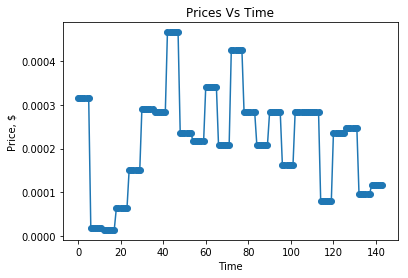

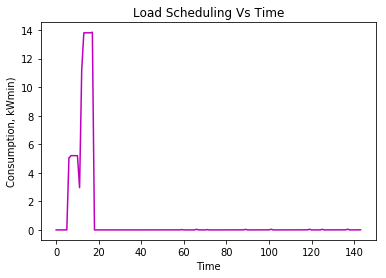

In [2]:
## Parameter Setting
# For All
pr = price()
N = len(pr)
dt = 10
# the number of residence in one apartment
Residence = 2
DR = 15000000000000
# extremely small number to obtain correct di
epsilon = 1e-10
# beginning time: 17:00
DR_b = 17
DR_b = DR_b * 6 - 1
# ending time: 19:00
DR_e = 19
DR_e = DR_e * 6 - 1
# For NL
L = np.array([5, 6, 12])
P_NL = np.array([1.3, 3, 1.2])
NL_b = np.array([0, 0, 0])
NL_e = np.array([N - 1, N - 1, N - 1])
L = np.tile(L, Residence)
P_NL = np.tile(P_NL, Residence)
NL_b = np.tile(NL_b, Residence)
NL_e = np.tile(NL_e, Residence)
# For IL
P_IL = np.array([1.4])
E_IL = np.array([156])
T_off = np.array([2])
IL_b = np.array([0, 0])
IL_e = np.array([N - 1, N - 1])
P_IL = np.tile(P_IL, Residence)
E_IL = np.tile(E_IL, Residence)
T_off = np.tile(T_off, Residence)
IL_b = np.tile(IL_b, Residence)
IL_e = np.tile(IL_e, Residence)
Pmin = 0.2 * P_IL
# For TCL
P_TCL = np.array([4.5])
c_water = 0.000073
mass = np.array([50])
temp_up = np.array([80])
temp_o = np.array([25])
temp_req = np.array([37])
temp_en = np.array([[26]])
di = np.arange(mass[0] / N, mass[0] + epsilon, mass[0] / N)
P_TCL = np.tile(P_TCL, Residence)
mass = np.tile(mass, Residence)
temp_up = np.tile(temp_up, Residence)
temp_o = np.tile(temp_o, Residence)
temp_req = np.tile(temp_req, Residence)
temp_en = np.tile(temp_en, (Residence, N))
di = np.tile(di, (Residence, 1))

## MILP Solution
solution = Real_Case(pr, N, dt, DR, DR_b, DR_e, L, P_NL, NL_b, NL_e, P_IL, E_IL, T_off, Pmin, IL_b, IL_e, P_TCL, c_water, mass, temp_up, temp_o, temp_req, temp_en, di)

# Plot
fig, ax = plt.subplots() # Price
fig, ax1 = plt.subplots() # Total Power consumed by ALL
ax.plot(pr, 'o-')
ax1.plot(solution[3], 'm-') 
ax.plot()
ax1.plot()
ax.set(xlabel='Time', ylabel='Price, $', title='Prices Vs Time');
ax1.set(xlabel='Time', ylabel='Consumption, kWmin)', title='Load Scheduling Vs Time');

## Test Case 2

Optimize a model with 2841 rows, 2592 columns and 53928 nonzeros
Variable types: 1440 continuous, 1152 integer (1152 binary)
Coefficient statistics:
  Matrix range     [3e-01, 3e+01]
  Objective range  [1e-04, 1e-02]
  Bounds range     [1e+00, 5e+00]
  RHS range        [3e-04, 2e+02]
Presolve removed 898 rows and 470 columns
Presolve time: 0.16s
Presolved: 1943 rows, 2122 columns, 29947 nonzeros
Variable types: 1002 continuous, 1120 integer (1120 binary)
Found heuristic solution: objective 0.1206481

Root relaxation: objective 7.442385e-02, 259 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.07442    0   39    0.12065    0.07442  38.3%     -    0s
H    0     0                       0.0839158    0.07442  11.3%     -    0s
     0     0    0.07926    0    7    0.08392    0.07926  5.55%     -    0s
H    0     0                       0.0836732   

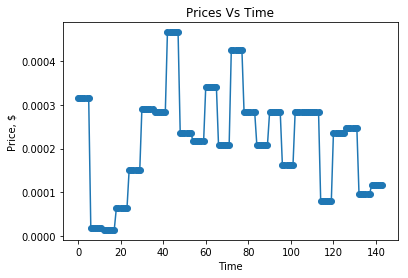

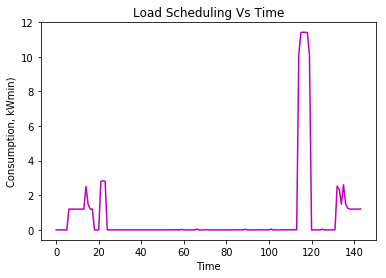

In [3]:
## Parameter Setting
# For All
pr = price()
N = len(pr)
dt = 10
# the number of residence in one apartment
Residence = 2
DR = 160
# extremely small number to obtain correct di
epsilon = 1e-10
# beginning time: 17:00
DR_b = 0
# ending time: 19:00
DR_e = 20
# For NL (1. Clothes Washer; 2. Clothes Dryer; 3. Dishwasher)
L = np.array([5, 6, 12])
P_NL = np.array([1.3, 3, 1.2])
NL_b = np.array([0, 0, 0])
NL_e = np.array([N - 1, N - 1, N - 1])
L = np.tile(L, Residence)
P_NL = np.tile(P_NL, Residence)
NL_b = np.tile(NL_b, Residence)
NL_e = np.tile(NL_e, Residence)
# For IL (1. AC)
P_IL = np.array([1.4])
E_IL = np.array([156])
T_off = np.array([2])
IL_b = np.array([0, 0])
IL_e = np.array([N - 1, N - 1])
P_IL = np.tile(P_IL, Residence)
E_IL = np.tile(E_IL, Residence)
T_off = np.tile(T_off, Residence)
IL_b = np.tile(IL_b, Residence)
IL_e = np.tile(IL_e, Residence)
Pmin = 0.2 * P_IL
# For TCL (1. Water Heater)
P_TCL = np.array([4.5])
c_water = 0.000073
mass = np.array([50])
temp_up = np.array([80])
temp_o = np.array([25])
temp_req = np.array([37])
temp_en = np.array([[26]])
di = np.arange(mass[0] / N, mass[0] + epsilon, mass[0] / N)
P_TCL = np.tile(P_TCL, Residence)
mass = np.tile(mass, Residence)
temp_up = np.tile(temp_up, Residence)
temp_o = np.tile(temp_o, Residence)
temp_req = np.tile(temp_req, Residence)
temp_en = np.tile(temp_en, (Residence, N))
di = np.tile(di, (Residence, 1))

## MILP Solution
solution = Real_Case(pr, N, dt, DR, DR_b, DR_e, L, P_NL, NL_b, NL_e, P_IL, E_IL, T_off, Pmin, IL_b, IL_e, P_TCL, c_water, mass, temp_up, temp_o, temp_req, temp_en, di)

# Plot
fig, ax = plt.subplots() # Price
fig, ax1 = plt.subplots() # Total Power consumed by ALL
ax.plot(pr, 'o-')
ax1.plot(solution[3], 'm-') 
ax.plot()
ax1.plot()
ax.set(xlabel='Time', ylabel='Price, $', title='Prices Vs Time');
ax1.set(xlabel='Time', ylabel='Consumption, kWmin)', title='Load Scheduling Vs Time');

## Test Case 3

Optimize a model with 14201 rows, 12960 columns and 269640 nonzeros
Variable types: 7200 continuous, 5760 integer (5760 binary)
Coefficient statistics:
  Matrix range     [3e-01, 3e+01]
  Objective range  [1e-04, 1e-02]
  Bounds range     [1e+00, 5e+00]
  RHS range        [3e-04, 8e+02]
Presolve removed 4912 rows and 2463 columns
Presolve time: 0.78s
Presolved: 9289 rows, 10497 columns, 113482 nonzeros
Variable types: 4737 continuous, 5760 integer (5760 binary)
Found heuristic solution: objective 0.6032404

Root relaxation: objective 3.721193e-01, 1274 iterations, 0.04 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.37212    0  210    0.60324    0.37212  38.3%     -    1s
H    0     0                       0.5317338    0.37212  30.0%     -    1s
     0     0    0.39630    0   29    0.53173    0.39630  25.5%     -    1s
     0     0    0.39699    0  188    0.

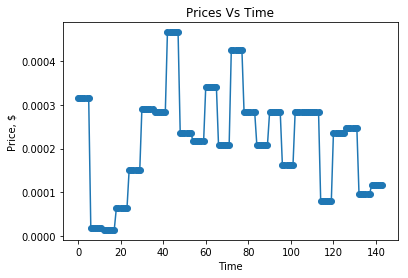

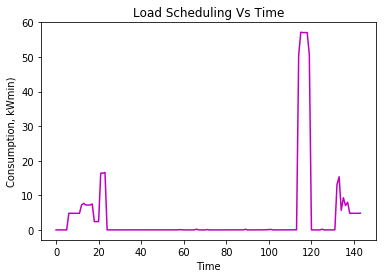

In [4]:
## Parameter Setting
# For All
pr = price()
N = len(pr)
dt = 10
# the number of residence in one apartment
Residence = 10
DR = 800
# extremely small number to obtain correct di
epsilon = 1e-10
# beginning time: 17:00
DR_b = 0
# ending time: 19:00
DR_e = 20
# For NL (1. Clothes Washer; 2. Clothes Dryer; 3. Dishwasher)
L = np.array([5, 6, 12])
P_NL = np.array([1.3, 3, 1.2])
NL_b = np.array([0, 0, 0])
NL_e = np.array([N - 1, N - 1, N - 1])
L = np.tile(L, Residence)
P_NL = np.tile(P_NL, Residence)
NL_b = np.tile(NL_b, Residence)
NL_e = np.tile(NL_e, Residence)
# For IL (1. AC)
P_IL = np.array([1.4])
E_IL = np.array([156])
T_off = np.array([2])
IL_b = np.array([0, 0])
IL_e = np.array([N - 1, N - 1])
P_IL = np.tile(P_IL, Residence)
E_IL = np.tile(E_IL, Residence)
T_off = np.tile(T_off, Residence)
IL_b = np.tile(IL_b, Residence)
IL_e = np.tile(IL_e, Residence)
Pmin = 0.2 * P_IL
# For TCL (1. Water Heater)
P_TCL = np.array([4.5])
c_water = 0.000073
mass = np.array([50])
temp_up = np.array([80])
temp_o = np.array([25])
temp_req = np.array([37])
temp_en = np.array([[26]])
di = np.arange(mass[0] / N, mass[0] + epsilon, mass[0] / N)
P_TCL = np.tile(P_TCL, Residence)
mass = np.tile(mass, Residence)
temp_up = np.tile(temp_up, Residence)
temp_o = np.tile(temp_o, Residence)
temp_req = np.tile(temp_req, Residence)
temp_en = np.tile(temp_en, (Residence, N))
di = np.tile(di, (Residence, 1))

## MILP Solution
solution = Real_Case(pr, N, dt, DR, DR_b, DR_e, L, P_NL, NL_b, NL_e, P_IL, E_IL, T_off, Pmin, IL_b, IL_e, P_TCL, c_water, mass, temp_up, temp_o, temp_req, temp_en, di)

# Plot
fig, ax = plt.subplots() # Price
fig, ax1 = plt.subplots() # Total Power consumed by ALL
ax.plot(pr, 'o-')
ax1.plot(solution[3], 'm-') 
ax.plot()
ax1.plot()
ax.set(xlabel='Time', ylabel='Price, $', title='Prices Vs Time');
ax1.set(xlabel='Time', ylabel='Consumption, kWmin)', title='Load Scheduling Vs Time');

## Description:

1. In each test cases, there are 24 hours counted, each residence has one clothes washer, one clothes dryer, one dishwasher, 1 AC, 1 water boiler.
2. Test Case 1 has 2 residences, DR is too high to do constraint anything.
3. Test Case 2 has 2 residences, DR is set where the price is the lowest with meaningful value
4. Test Case 3 has 10 residences in one apartment, DR is set similar to the one in Test Case 2

## Results:

1. From the graphs of Load Scheduling VS Time between case 1 and 2, we can find DR has large impact on schduling
2. C1: Presolve removed 2565 rows and 2453 columns. Presolve time: 0.17s. Presolved: 276 rows, 139 columns, 19458 nonzeros. Variable types: 139 continuous, 0 integer (0 binary). Explored 0 nodes (70 simplex iterations) in 0.21 seconds.
3. C2: Presolve removed 898 rows and 470 columns. Presolve time: 0.16s. Presolved: 1943 rows, 2122 columns, 29947 nonzeros. Variable types: 1002 continuous, 1120 integer (1120 binary). Found heuristic solution: objective 0.1206481. Explored 24 nodes (2167 simplex iterations) in 1.66 seconds.
4. C3:Presolve removed 4912 rows and 2463 columns.Presolve time: 0.78s. Presolved: 9289 rows, 10497 columns, 113482 nonzeros. Variable types: 4737 continuous, 5760 integer (5760 binary). Found heuristic solution: objective 0.6032404. Explored 297 nodes (22574 simplex iterations) in 10.64 seconds.